In this work, we performed two different data augmentations, i.e., stretching and shifting.
* **Stretching (ST)**: slow down or speed up both the intensity and phase signals. Each signal is streatched by four factors: {0.8, 0.9, 1.1, 1.2}.
* **Shifting (SH)**: circular shift both the intensity and phase signals by 3 different percentages of the signal length: {0.2, 0.4, 0.6}.

#### 1. Data augmentation - Stretching 

In [1]:
import numpy as np
import scipy.io
import h5py
filepath = './DAS1K/CARHORN/carhorn1.mat'   ### You can change the filepath to check another 9 classes
SIGNAL = {}
f = h5py.File(filepath)
for k, v in f.items():
    SIGNAL[k] = np.array(v)
SIGNAL=SIGNAL['carhorn1']     
print(SIGNAL.shape)

(2, 39450)


```librosa.effects.time_stretch(y, rate, **kwargs)```
* Stretch factor. If rate > 1, then the signal is sped up. If rate < 1, then the signal is slowed down.

In [18]:
import librosa
SIGNAL0_stretch = librosa.effects.time_stretch(SIGNAL[0,:],rate=0.8) 
SIGNAL1_stretch = librosa.effects.time_stretch(SIGNAL[1,:],rate=0.8)

In [9]:
SIGNAL1_stretch.shape

(49664,)

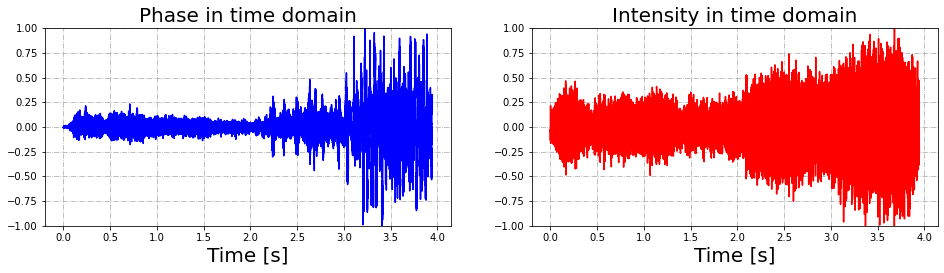

In [16]:
import matplotlib.pyplot as plt
fs=10000
### intensity 

plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(SIGNAL[0,:]))/fs,SIGNAL[0,:],'b')
plt.ylim([-1,1])
plt.grid(linestyle='-.')
plt.xlabel('Time [s]', fontsize=20)
plt.title('Phase in time domain', fontsize=20)


### phase
plt.subplot(2, 2, 2)
plt.plot(np.arange(len(SIGNAL[1,:]))/fs,SIGNAL[1,:],'r')
plt.ylim([-1,1])
plt.grid(linestyle='-.')
plt.xlabel('Time [s]', fontsize=20)
plt.title('Intensity in time domain', fontsize=20)
plt.show()


Text(0.5, 1.0, 'Strecthed intensity in time domain')

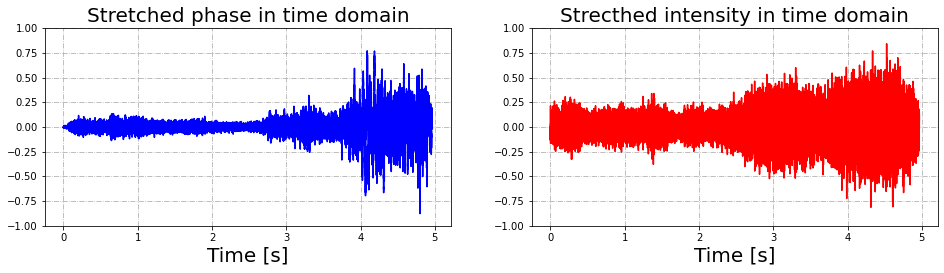

In [17]:
### intensity after stretching
plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(SIGNAL0_stretch))/fs,SIGNAL0_stretch,'b')
plt.grid(linestyle='-.')
plt.ylim([-1,1])
plt.xlabel('Time [s]', fontsize=20)
plt.title('Stretched phase in time domain', fontsize=20)

### phase after stretching

plt.subplot(2, 2, 2)
plt.plot(np.arange(len(SIGNAL1_stretch))/fs,SIGNAL1_stretch,'r')
plt.grid(linestyle='-.')
plt.ylim([-1,1])
plt.xlabel('Time [s]', fontsize=20)
plt.title('Strecthed intensity in time domain', fontsize=20)

In [22]:
import IPython.display as ipd
print('This is the phase information')
ipd.Audio(SIGNAL[0,:], rate=fs)

This is the phase information


In [26]:
print('This is the intensity information')
ipd.Audio(SIGNAL[1,:], rate=fs)

This is the intensity information


In [24]:
print('This is the stretched phase information')
ipd.Audio(SIGNAL0_stretch, rate=fs)

This is the stretched phase information


In [25]:
print('This is the stretched intensity information')
ipd.Audio(SIGNAL1_stretch, rate=fs)

This is the stretched intensity information


#### 2. Data augmentation - Shifting

```numpy.roll(a, shift, axis=None)```
* Roll array elements along a given axis.

In [30]:
SIGNAL0_roll = np.roll(SIGNAL[0,:], int(0.6*len(SIGNAL[0,:])))
SIGNAL1_roll = np.roll(SIGNAL[1,:], int(0.6*len(SIGNAL[1,:])))

Text(0.5, 1.0, 'Shifted intensity in time domain')

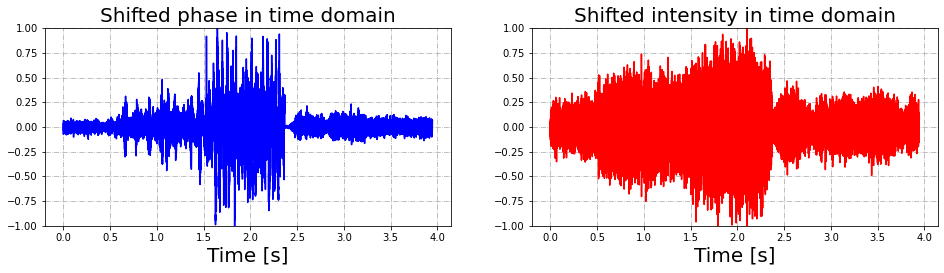

In [34]:
### intensity after shifting
plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(SIGNAL0_roll))/fs,SIGNAL0_roll,'b')
plt.grid(linestyle='-.')
plt.ylim([-1,1])
plt.xlabel('Time [s]', fontsize=20)
plt.title('Shifted phase in time domain', fontsize=20)

### phase after shifting

plt.subplot(2, 2, 2)
plt.plot(np.arange(len(SIGNAL1_roll))/fs,SIGNAL1_roll,'r')
plt.grid(linestyle='-.')
plt.ylim([-1,1])
plt.xlabel('Time [s]', fontsize=20)
plt.title('Shifted intensity in time domain', fontsize=20)

In [32]:
print('This is the shifted phase information')
ipd.Audio(SIGNAL0_roll, rate=fs)

This is the shifted phase information


In [33]:
print('This is the shifted intensity information')
ipd.Audio(SIGNAL1_roll, rate=fs)

This is the shifted intensity information
